# Try GRASS GIS in Jupyter Notebook with Python

[<img src="https://grass.osgeo.org/uploads/images/logo/grassgis_logo_colorlogo_text_alphabg.png" alt="GRASS GIS" style="width:200px;"/>](https://grass.osgeo.org/)

This is a quick introduction into *GRASS GIS* in a *Jupyter Notebook* using the *Python* scripting language.
The interactive notebook is available online thanks to the [*Binder*](https://mybinder.org/) service.

Examples here are using a sample GRASS GIS dataset for North Carolina, USA. The dataset is included in this environment.

## Usage

To run the selected part which is called a cell, hit `Shift + Enter`.

## Start

There is several ways how GRASS GIS can be used. When using Python in notebook, we usually find GRASS GIS Python packages, import them, initialize GRASS GIS session, and set several variables useful for using GRASS GIS in a notebook.

In [1]:
# import Python standard library and IPython packages we need
import os
import sys
import subprocess
from IPython.display import Image

# ask GRASS GIS where its Python packages are
gisbase = subprocess.check_output(["grass", "--config", "path"]).strip()
os.environ['GISBASE'] = gisbase
sys.path.append(os.path.join(gisbase, "etc", "python"))

# import GRASS GIS packages we need
import grass.script as gs
import grass.script.setup as gsetup

# create GRASS GIS session
rcfile = gsetup.init(gisbase, "data/grassdata", "nc_basic_spm_grass7", "user1")

# we want functions to raise exceptions and see standard output of the modules
gs.set_raise_on_error(True)
gs.set_capture_stderr(True)
# simply overwrite existing maps like we overwrite Python variable values
os.environ['GRASS_OVERWRITE'] = '1'
# enable map rendering to in Jupyter Notebook
os.environ['GRASS_FONT'] = 'sans'
# set display modules to render into a file (named map.png by default)
os.environ['GRASS_RENDER_IMMEDIATE'] = 'cairo'
os.environ['GRASS_RENDER_FILE_READ'] = 'TRUE'
os.environ['GRASS_LEGEND_FILE'] = 'legend.txt'

## Raster buffer

Set computational region and create multiple buffers in given distances
around lakes represented as raster:

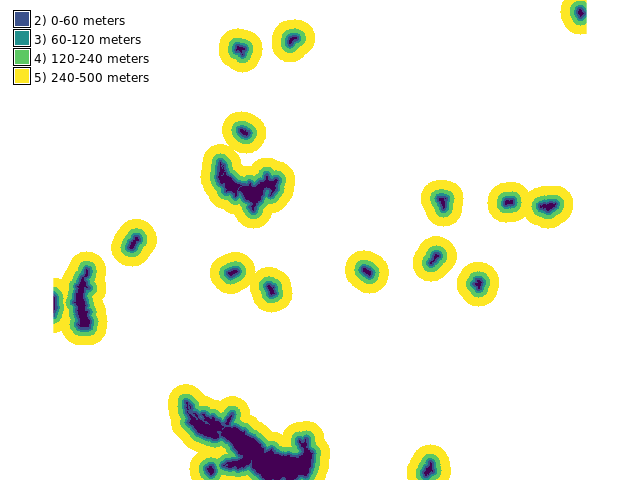

In [2]:
gs.parse_command('g.region', raster="lakes", flags='pg')
gs.run_command('r.buffer', input="lakes", output="lakes_buff", distances=[60, 120, 240, 500])
gs.run_command('d.erase')
gs.run_command('d.rast', map="lakes_buff")
gs.run_command('d.legend', raster="lakes_buff", range=(2, 5), at=(80, 100, 2, 10))
Image(filename="map.png")

## Vector buffer

Create a negative buffer around state boundary represented as a vector.
Vector modules typically don't follow computational region,
but we set it to inform display modules about our area of interest.

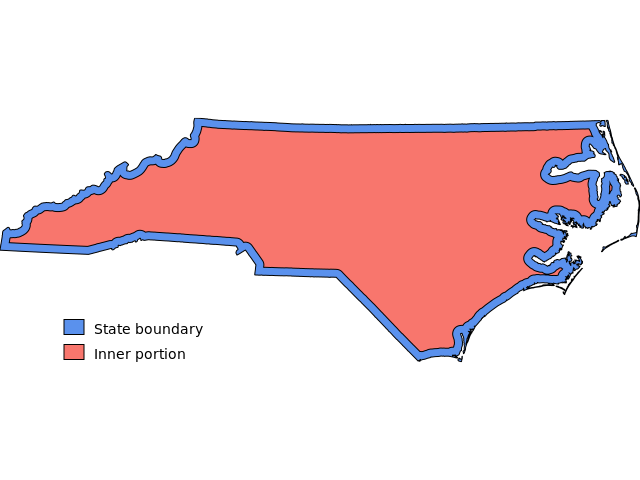

In [3]:
gs.run_command('v.buffer', input="boundary_state", output="buffer", distance=-10000)
gs.parse_command('g.region', vector="boundary_state", flags='pg')
gs.run_command('d.erase')  # erase the display before drawing again
!rm -f $GRASS_LEGEND_FILE  # and remove the legend file
gs.run_command('d.vect', map="boundary_state", fill_color="#5A91ED", legend_label="State boundary")
gs.run_command('d.vect', map="buffer", fill_color="#F8766D", legend_label="Inner portion")
gs.run_command('d.legend.vect', at=(10, 35))
Image(filename="map.png")